# logistic regression classification model







# Malik Muhammad Zeeshan


Estimated time needed: **25** minutes
    

## Objectives

After completing this lab you will be able to:

* Use logistic regression classification model classify data


In this Lab you will load a customer dataset, fit the data, and use logistic regression classification model to predict a data point. But what is **logistic regression classification model**?


#logistic regression classification
 model is a statistical method used for binary classification problems, where the goal is to predict one of two possible outcomes. It's particularly useful when the dependent variable (the target) is binary, meaning it has only two values, such as 0 and 1, yes and no, or true and false.

Here's an explanation of each step involved in creating a logistic regression classification model:


<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#about_dataset">About the dataset</a></li>
        <li><a href="#visualization_analysis">Data Visualization and Analysis</a></li>
        <li><a href="#classification">Classification</a></li>
    </ol>
</div>
<br>
<hr>


#Step 1: Import Libraries

Start by importing the necessary libraries for data preprocessing, model building, and evaluation. Common libraries include NumPy, pandas, scikit-learn, and matplotlib.

Let's load required libraries


In [81]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

<div id="about_dataset">
    <h2>About the dataset</h2>
</div>


Let's download the dataset. To download the data, we will use !wget to download it from IBM Object Storage.


__Did you know?__ When it comes to Machine Learning, you will likely be working with large datasets. As a business, where can you host your data?


#Step 2: Load and Explore Data

Load your dataset into a DataFrame and explore its contents.

### Load Data From CSV File  


In [82]:
data = pd.read_csv('gender_submission.csv')  # Load your dataset
data.head(10)  # Display the first few rows


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [83]:
data.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0


<div id="visualization_analysis">
    <h2>Data Visualization and Analysis</h2>
</div>


In [84]:
data.describe()

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.363636
std,120.810458,0.481622
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000



#### Let’s see how many of each class is in our data set


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [86]:
data['Survived'].value_counts()


0    266
1    152
Name: Survived, dtype: int64

You can easily explore your data using visualization techniques:


array([[<Axes: title={'center': 'Survived'}>]], dtype=object)

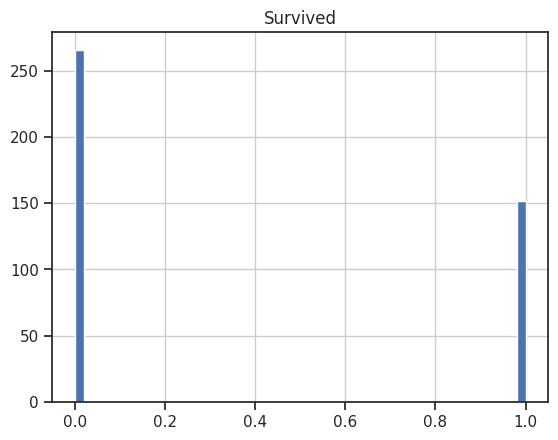

In [87]:

data.hist(column='Survived', bins=50)

### Feature set


Let's define feature sets, X:


In [88]:
data.columns

Index(['PassengerId', 'Survived'], dtype='object')

To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:


In [89]:
X = data[['PassengerId', 'Survived']] .values  #.astype(float)
X[0:10]


array([[892,   0],
       [893,   1],
       [894,   0],
       [895,   0],
       [896,   1],
       [897,   0],
       [898,   1],
       [899,   0],
       [900,   1],
       [901,   0]])

What are our labels?


In [90]:
y = data['Survived'].values
y[0:5]

array([0, 1, 0, 0, 1])

### Train Test Split  
Out of Sample Accuracy is the percentage of correct predictions that the model makes on data that the model has NOT been trained on. Doing a train and test on the same dataset will most likely have low out-of-sample accuracy, due to the likelihood of our model overfitting.

It is important that our models have a high, out-of-sample accuracy, because the purpose of any model, of course, is to make correct predictions on unknown data. So how can we improve out-of-sample accuracy? One way is to use an evaluation approach called Train/Test Split.
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.

This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that has been used to train the model. It is more realistic for the real world problems.


In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (334, 2) (334,)
Test set: (84, 2) (84,)


## Normalize Data


Data Standardization gives the data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on the distance of data points:


In [92]:
X_train_norm = preprocessing.StandardScaler().fit(X_train).transform(X_train.astype(float))
X_train_norm[0:5]

array([[ 0.87690098, -0.73428231],
       [-0.71594142, -0.73428231],
       [-1.0460642 , -0.73428231],
       [-0.00617745, -0.73428231],
       [ 0.29093305, -0.73428231]])

<div id="classification">
    <h2>Classification</h2>
</div>


<h3>logistic regression classification</h3>






#Step 5: Feature Scaling (Optional)

Depending on the algorithm and dataset, you might need to standardize or scale the features. Logistic regression is not as sensitive to feature scaling as some other algorithms, so this step is optional.

#### Import library


In [93]:
from sklearn.preprocessing import StandardScaler

### Training



In [94]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [95]:
X_test_norm = preprocessing.StandardScaler().fit(X_test).transform(X_test.astype(float))
X_test_norm[0:5]

array([[-1.66665731,  1.18321596],
       [ 1.21044339,  1.18321596],
       [-1.14354809, -0.84515425],
       [-0.02983169,  1.18321596],
       [ 0.94045154,  1.18321596]])

#Step 6: Create and Train the Logistic Regression Model

Create an instance of the logistic regression model, fit it to the training data, and train the model.

In [96]:
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)


LogisticRegression()

### Predicting
We can use the model to make predictions on the test set:


In [97]:
y_pred = logistic_reg.predict(X_test)


### Accuracy evaluation
In multilabel classification, __accuracy classification score__ is a function that computes subset accuracy. This function is equal to the jaccard_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.


In [98]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print('Accuracy:', accuracy)
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)


Accuracy: 1.0
Confusion Matrix:
 [[49  0]
 [ 0 35]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        35

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



### Thank you for completing this lab!




## Author

Malik Muhammad Zeeshan


### Other Contributors

<a href="www.linkedin.com/in/muhammadzeeshan007/" target="_blank">Muhammad Zeeshan</a>




## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2023-05-29  | 2.5  | Anita Verma  | Changed the sequence for Data Analysis |
| 2021-01-21  | 2.4  | Lakshmi  | Updated sklearn library |
| 2020-11-20  | 2.3  | Lakshmi  | Removed unused imports |
| 2020-11-17  | 2.2  | Lakshmi  | Changed plot function of KNN |
| 2020-11-03  | 2.1  | Lakshmi  | Changed URL of csv |
| 2020-08-27  | 2.0  | Lavanya  |  Moved lab to course repo in GitLab |
|   |   |   |   |
|   |   |   |   |


## <h3 align="center"> © AIBOOM Corporation 2023. All rights reserved. <h3/>
